<a href="https://colab.research.google.com/github/annisapa/data-analyst/blob/main/DA_assignment_JALA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Annisa Permatasari A - 13/05/2024

#IMPORT LIBRARIES,DATA

In [175]:
!pip install pandasql
import pandasql as ps
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kruskal


In [176]:
#import data farms
sheet_url = "https://docs.google.com/spreadsheets/d/1JjMuoIYyJwTVbSredBsDlj6VLOpnOv3Sr6HvPs34Omc/edit#gid=1944474427"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
farms = pd.read_csv(url_1)

#import data ponds
sheet_url = "https://docs.google.com/spreadsheets/d/1n7C6CeNJkq1MOx6kmK92WJYlokk9oucBrX8GcbqJ79o/edit#gid=2004755819"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
ponds = pd.read_csv(url_1)

#import data cycles
sheet_url = "https://docs.google.com/spreadsheets/d/1W8Suhnlk2Vn_N_6HzCQty3yqdFf9w0DZYns8g0kKbKY/edit#gid=631141068"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
cycles = pd.read_csv(url_1)

#import data feeds
sheet_url = "https://docs.google.com/spreadsheets/d/1aTcJJNlgcVCigMkwvJcSyEzas-oJEFTZSTyFBN2MvmI/edit#gid=232519194"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
feeds = pd.read_csv(url_1)

#import data fasting
sheet_url = "https://docs.google.com/spreadsheets/d/15rfDdfzOG1L1pbavy6rv-GxwZJ7QCLRHqyZ9hjAvGB0/edit#gid=62466825"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
fasting = pd.read_csv(url_1)

#import data samplings
sheet_url = "https://docs.google.com/spreadsheets/d/1c0Rv-ETmlUSlS-j4vn4SfH49pmQwbARqeihRwS-x7lU/edit#gid=1461310382"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
samplings = pd.read_csv(url_1)

#import data measurements
sheet_url = "https://docs.google.com/spreadsheets/d/1DlTJIR5D8k3cwoSsLYV0rKjXeJxtvgy7pkhh9IKkRGU/edit#gid=391283126"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
measurements = pd.read_csv(url_1)

#import data harvests
sheet_url = "https://docs.google.com/spreadsheets/d/1djCLuZANCTyQPHX0g3gfHzJjLJkl9hzn7X5aW82Qfkc/edit#gid=950996188"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
harvests = pd.read_csv(url_1)

#import data Feeding Rate
sheet_url = "https://docs.google.com/spreadsheets/d/1OZzmchpworu7Xa0kinsiZo_mTN9maUnB/edit#gid=1941072688"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=xlsx&gid=')
tabel_fr = pd.read_excel(url_1)
tabel_fr = sqldf("SELECT doc,COALESCE(LAG(abw,1) OVER (ORDER BY doc),0) abw_min,(abw-0.01) abw_max ,fr from tabel_fr")

#Data Preparation

####Mengecek data duplikat
* Data Ponds

In [177]:
print("Data ponds memiliki", ponds.duplicated().sum(),"data duplikat")

Data ponds memiliki 0 data duplikat


* Data Farms

In [178]:
print("Data farms memiliki",farms.duplicated().sum(),"data duplikat")

Data farms memiliki 0 data duplikat


* Data Cycles

In [179]:
print("Data cycles memiliki",cycles.duplicated().sum(),"data duplikat")

Data cycles memiliki 6 data duplikat


In [180]:
cycles[cycles.duplicated()]

,id,pond_id,total_seed,started_at,finished_at,area
451,20671,37707,115000,2023-01-09 0:00:00,2023-04-16 0:00:00,780.000
452,20671,37707,115000,2023-01-09 0:00:00,2023-04-16 0:00:00,780.000
453,20671,37707,115000,2023-01-09 0:00:00,2023-04-16 0:00:00,780.000
455,20246,37708,115000,2023-01-09 0:00:00,2023-04-16 0:00:00,780.000
456,20246,37708,115000,2023-01-09 0:00:00,2023-04-16 0:00:00,780.000
457,20246,37708,115000,2023-01-09 0:00:00,2023-04-16 0:00:00,780.000


6 data duplikat tersebut adalah data yang memiliki cycle id 20671 dan 20246

In [181]:
print("Data ponds memiliki",feeds.duplicated().sum(),"data duplikat")

Data ponds memiliki 5099 data duplikat


In [182]:
feeds[feeds.duplicated()].head()

,cycle_id,logged_at,quantity
72,15308,2022-11-18 11:30:00.000,1.500
206,15308,2022-12-10 11:00:00.000,6.000
473,15308,2022-11-17 23:00:00.000,1.500
474,15308,2022-11-18 10:30:00.000,1.500
1255,12359,2022-10-20 00:00:00.000,2.000


data duplikat pada data feeds diantaranya adalah data cycle id 7615

In [183]:
print("Data ponds memiliki",fasting.duplicated().sum(),"data duplikat")

Data ponds memiliki 67 data duplikat


In [184]:
fasting[fasting.duplicated()].head()

,logged_date,cycle_id,fasting
375,2023-03-04,12869,1.000
581,2022-05-10,15017,1.000
859,2023-03-12,15499,0.000
990,2022-11-30,15516,1.000
1109,2022-06-21,15789,1.000


data duplikat pada data feeds diantaranya adalah data cycle id 12869,15017,15499,15516,15789 dsb.

In [185]:
print("Data ponds memiliki",samplings.duplicated().sum(),"data duplikat")

Data ponds memiliki 130 data duplikat


In [186]:
samplings[samplings.duplicated()].head()

,cycle_id,sampled_at,average_weight
40,18238,2023-05-09,6.590
70,15802,2022-07-21,4.650
91,17857,2022-06-28,10.900
232,18877,2022-11-02,1.800
297,22601,2023-02-22,2.130


data duplikat pada data feeds diantaranya adalah data cycle id 18238,15802,17857,18877, 22601 dsb.

In [187]:
print("Data ponds memiliki",measurements.duplicated().sum(),"data duplikat")

Data ponds memiliki 0 data duplikat


In [188]:
print("Data ponds memiliki",harvests.duplicated().sum(),"data duplikat")

Data ponds memiliki 0 data duplikat


In [189]:
cycles = cycles.drop_duplicates()
feeds = feeds.drop_duplicates()
fasting = fasting.drop_duplicates()
samplings = samplings.drop_duplicates()

####Mengecek data kosong/NA

In [190]:
farms[farms.isnull().any(axis=1)].head()

,id,province,regency,timezone
88,8375,NaN,NaN,+07:00
89,8383,NaN,NaN,+07:00
90,8385,NaN,NaN,+07:00
93,8402,NaN,NaN,+07:00
94,8405,NaN,NaN,+07:00


In [191]:
ponds[ponds.isnull().any(axis=1)]

,id,farm_id,length,width,deep
75,23703,8318,38.300,28.720,NaN
125,27104,10250,66.680,50.010,NaN
203,28946,8730,40.000,30.000,NaN
301,28942,8730,43.200,32.400,NaN


In [192]:
cycles[cycles.isnull().any(axis=1)].head()

,id,pond_id,total_seed,started_at,finished_at,area


In [193]:
fasting[fasting.isnull().any(axis=1)].head()

,logged_date,cycle_id,fasting
42,2022-09-22,9090,NaN
873,2022-09-04,15505,NaN
874,2022-09-07,15505,NaN
875,2022-09-13,15505,NaN
1201,2022-12-10,15869,NaN


In [194]:
feeds[feeds.isnull().any(axis=1)]

,cycle_id,logged_at,quantity
64157,18989,NaN,NaN
74152,20401,NaN,NaN
86990,20953,NaN,NaN
111164,19065,NaN,NaN


In [195]:
harvests[harvests.isnull().any(axis=1)].head()

,cycle_id,size,weight,id,harvested_at,status
46,11081,93.000,130.000,13740.000,2022-09-20,NaN
349,15767,95.000,143.180,11379.000,2022-07-03,NaN
350,15767,92.000,321.210,11582.000,2022-07-06,NaN
655,17437,77.000,447.620,13521.000,2022-10-03,NaN
656,17437,77.000,64.580,13522.000,2022-10-03,NaN


In [196]:
samplings[samplings.isnull().any(axis=1)]

,cycle_id,sampled_at,average_weight


In [197]:
measurements[measurements.isnull().any(axis=1)].head()

,pond_id,cycle_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,35456,23531,2022-09-27,27.500,NaN,3.400,NaN,31.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37074,15493,2023-03-02,29.200,28.600,NaN,NaN,15.000,15.000,7.870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32638,15498,2022-06-07,27.000,29.000,NaN,NaN,31.000,31.000,8.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18212,16294,2022-10-19,25.300,27.100,12.500,17.400,13.000,13.000,7.900,...,NaN,1.313,70.000,4643.000,595.000,4048.000,NaN,70.000,175.000,NaN
4,30607,20429,2022-04-04,28.700,31.100,4.900,NaN,NaN,NaN,8.230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####Penanganan data kosong

In [198]:
#Data kosong pada tabel Farms, Fasting, Feeds,Harvests dihapus
farms = farms.dropna()
fasting = fasting.dropna()
feeds = feeds.dropna()
harvests = harvests.dropna()

In [199]:
#Data kosong pada tabel Ponds dan Measurements diisi dengan menggunakan nilai rata-rata
ponds['deep'] = ponds['deep'].fillna(ponds['deep'].mean())
measurements.iloc[:,3:24] = measurements.iloc[:,3:24].fillna(measurements.iloc[:,3:24].mean())

## Kasus Khusus

In [200]:
feeds = sqldf("SELECT cycle_id,logged_at,sum(quantity) quantity FROM feeds  GROUP BY 1,2") #cycle_id = 17609 and logged_At = '2022-11-24 23:00:00.000'
samplings = sqldf("SELECT cycle_id,sampled_at,sum(average_weight) average_weight FROM samplings GROUP BY 1,2")
fasting = sqldf("SELECT logged_date,cycle_id,fasting FROM fasting WHERE fasting=1 ")
harvests = sqldf("SELECT cycle_id,harvested_at,avg(size) size,sum(weight) weight FROM harvests group by 1,2")


## Gabung data

### Cycles


In [201]:
#Gabung data cycle(join farm ponds) + kolom lama panen + bulan mulai
cycles['started_at'] = pd.to_datetime(cycles['started_at'].str.split().str[0], format='%Y-%m-%d')
cycles['finished_at'] = pd.to_datetime(cycles['finished_at'].str.split().str[0],format="%Y-%m-%d")
cycles['lama_panen'] = (cycles['finished_at']-cycles['started_at']).dt.days
cycles['bulan_mulai'] = cycles['started_at'].dt.month

#join
cycles  = sqldf("SELECT farms.id farm_id,cycles.pond_id,cycles.id cycle_id,cycles.started_at,bulan_mulai,lama_panen,cycles.finished_at,cycles.total_seed,length,width,area,deep,total_seed/area padat_tebar,province FROM cycles  INNER JOIN ponds ON ponds.id = cycles.pond_id INNER JOIN farms ON farms.id = ponds.farm_id")

### Feeds

In [202]:
#Menambahkan kolom doc

doc_feeds = sqldf("SELECT province,farm_id,pond_id,length,width,deep,area,padat_tebar,feeds.cycle_id,date(logged_at) logged_at,date(started_at) started_at,date(finished_at) finished_at,cycles.bulan_mulai,lama_panen,total_seed,sum(quantity) daily_feed from feeds INNER JOIN cycles ON feeds.cycle_id = cycles.cycle_id GROUP BY 1,2,3,4,5,6,7,8,9,10,11,12,13")
doc_feeds['logged_at']= pd.to_datetime(doc_feeds['logged_at'], format='%Y-%m-%d')
doc_feeds['started_at'] = pd.to_datetime(doc_feeds['started_at'], format='%Y-%m-%d')
doc_feeds['doc'] =(doc_feeds['logged_at']-doc_feeds['started_at']).dt.days
doc_feeds = doc_feeds[doc_feeds['doc'] >= 0]
doc_feeds = sqldf("SELECT province, farm_id,pond_id,length,width,deep,area, padat_tebar, cycle_id, date(logged_at) logged_at,date(started_at) started_at,date(finished_at) finished_at,total_seed,doc,lama_panen , daily_feed,bulan_mulai,SUM(daily_feed) OVER (PARTITION BY cycle_id ORDER BY cycle_id,doc) sum_feed FROM doc_feeds")
doc_feeds.head()

,province,farm_id,pond_id,length,width,deep,area,padat_tebar,cycle_id,logged_at,started_at,finished_at,total_seed,doc,lama_panen,daily_feed,bulan_mulai,sum_feed
0,JAWA TENGAH,8470,34700,70.710,70.710,1.500,4999.900,40.001,7615,2023-01-13,2023-01-13,2023-06-06,200000,0,144,15.000,1,15.000
1,JAWA TENGAH,8470,34700,70.710,70.710,1.500,4999.900,40.001,7615,2023-01-14,2023-01-13,2023-06-06,200000,1,144,15.000,1,30.000
2,JAWA TENGAH,8470,34700,70.710,70.710,1.500,4999.900,40.001,7615,2023-01-15,2023-01-13,2023-06-06,200000,2,144,15.000,1,45.000
3,JAWA TENGAH,8470,34700,70.710,70.710,1.500,4999.900,40.001,7615,2023-01-16,2023-01-13,2023-06-06,200000,3,144,15.000,1,60.000
4,JAWA TENGAH,8470,34700,70.710,70.710,1.500,4999.900,40.001,7615,2023-01-17,2023-01-13,2023-06-06,200000,4,144,15.000,1,75.000


### Samplings

In [203]:
#Menambah kolom adg
doc_samplings =  sqldf("SELECT province,farm_id,pond_id,samplings.cycle_id,length,width,deep,CASE WHEN sampled_at > started_at THEN (julianday(sampled_at) - julianday(started_at)) ELSE NULL END doc,lama_panen,sampled_at,average_weight from samplings INNER JOIN cycles on cycles.cycle_id = samplings.cycle_id")
doc_samplings = sqldf("SELECT *, (average_weight - (LAG(average_weight,1) OVER (PARTITION BY cycle_id ORDER BY cycle_id,sampled_at)))/ (doc - (LAG(doc,1) OVER (PARTITION BY cycle_id ORDER BY cycle_id,sampled_at))) adg FROM doc_samplings" )
doc_samplings.head()

,province,farm_id,pond_id,cycle_id,length,width,deep,doc,lama_panen,sampled_at,average_weight,adg
0,JAWA TENGAH,8470,34700,7615,70.710,70.710,1.500,19.000,144,2023-02-01,1.300,NaN
1,JAWA TENGAH,8470,34700,7615,70.710,70.710,1.500,26.000,144,2023-02-08,2.900,0.229
2,JAWA TENGAH,8470,34700,7615,70.710,70.710,1.500,33.000,144,2023-02-15,4.850,0.279
3,JAWA TENGAH,8470,34700,7615,70.710,70.710,1.500,39.000,144,2023-02-21,5.660,0.135
4,JAWA TENGAH,8470,34700,7615,70.710,70.710,1.500,40.000,144,2023-02-22,5.660,0.000


## Data Final

### Budidaya

In [204]:
#create data final
budidaya = sqldf("SELECT doc_feeds.*,logged_date,fasting,average_weight,fr,harvested_at,harvests.size,harvests.weight,sampled_at,doc_samplings.adg from doc_feeds LEFT JOIN fasting on fasting.cycle_id = doc_feeds.cycle_id and fasting.logged_date = doc_feeds.logged_at LEFT JOIN doc_samplings on doc_samplings.cycle_id = doc_feeds.cycle_id and doc_samplings.sampled_at = doc_feeds.logged_at LEFT JOIN harvests on doc_feeds.cycle_id = harvests.cycle_id and harvests.harvested_at = doc_feeds.logged_at LEFT JOIN tabel_fr ON doc_samplings.average_weight BETWEEN tabel_fr.abw_min and abw_max")
budidaya = sqldf("SELECT budidaya.*,ROUND(daily_feed/(fr/100),2) estkg_biomassa FROM budidaya")
budidaya = sqldf("SELECT *,weight/area produktivitas,(sum_feed/estkg_biomassa) fcr,(1000*estkg_biomassa)/average_weight est_populasi,((1000*estkg_biomassa)/average_weight)/total_seed*100 est_survivalrate FROM budidaya ")
budidaya['fasting'] = budidaya['fasting'].astype(bool)
budidaya['farm_id'] = budidaya['farm_id'].astype(str)
budidaya['pond_id'] = budidaya['pond_id'].astype(str)
budidaya['cycle_id'] = budidaya['cycle_id'].astype(str)
budidaya = budidaya.fillna(0)

###Kualitas air

In [205]:
kualitas_air = sqldf("SELECT measurements.*,budidaya.est_survivalrate,budidaya.adg,budidaya.fcr FROM measurements INNER JOIN budidaya ON measurements.cycle_id = budidaya.cycle_id and measurements.measured_date = budidaya.logged_at")
kualitas_air['pond_id'] = kualitas_air['pond_id'].astype(str)
kualitas_air['cycle_id'] = kualitas_air['cycle_id'].astype(str)
#Label normal,abnormal parameter
#suhu
kualitas_air['status_morningtemp'] = np.where((kualitas_air['morning_temperature'] >= 28) & (kualitas_air['morning_temperature'] <= 32), 'normal', 'abnormal')
kualitas_air['status_eveningtemp'] = np.where((kualitas_air['evening_temperature'] >= 28) & (kualitas_air['evening_temperature'] <= 32), 'normal', 'abnormal')
#do
kualitas_air['status_morningdo'] = np.where((kualitas_air['morning_do'] >= 4) , 'normal', 'abnormal')
kualitas_air['status_eveningdo'] = np.where((kualitas_air['evening_do'] >= 4) , 'normal', 'abnormal')
#salinity
kualitas_air['status_morningsalinity'] = np.where((kualitas_air['morning_salinity'] >= 5) & (kualitas_air['morning_salinity'] <= 30), 'normal', 'abnormal')
kualitas_air['status_eveningsalinity'] = np.where((kualitas_air['evening_salinity'] >= 5) & (kualitas_air['evening_salinity'] <= 30), 'normal', 'abnormal')
#pH
kualitas_air['status_morningph'] = np.where((kualitas_air['morning_pH'] >= 7) & (kualitas_air['morning_pH'] <= 8.5), 'normal', 'abnormal')
kualitas_air['status_eveningph'] = np.where((kualitas_air['evening_pH'] >= 7) & (kualitas_air['evening_pH'] <= 8.5), 'normal', 'abnormal')
#transparency
kualitas_air['status_transparency'] = np.where((kualitas_air['transparency'] >= 25) & (kualitas_air['transparency'] <= 40), 'normal', 'abnormal')
#ammonia
kualitas_air['status_ammonia'] = np.where((kualitas_air['ammonia'] <= 0.1), 'normal', 'abnormal')
#nitrate mg/l
kualitas_air['status_nitrate'] = np.where((kualitas_air['nitrate'] >= 0.9) & (kualitas_air['nitrate'] <= 3.5), 'normal', 'abnormal')
#nitrite mg/l
kualitas_air['status_nitrite'] = np.where((kualitas_air['nitrate'] <= 0.06), 'normal', 'abnormal')
#alkalinity ppm
kualitas_air['status_alkalinity'] = np.where((kualitas_air['alkalinity'] >= 90) & (kualitas_air['alkalinity'] <= 150), 'normal', 'abnormal')


#EDA

##Budidaya

In [206]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
budidaya.select_dtypes(include=['int','float']).agg(['count', 'nunique', 'mean', 'std','var','min', 'max' ]).transpose()

,count,nunique,mean,std,var,min,max
length,35889.000,135.000,48.277,16.885,285.096,3.000,100.000
width,35889.000,140.000,41.945,16.501,272.270,2.000,70.710
deep,35889.000,19.000,2.919,14.852,220.580,0.700,150.000
area,35889.000,189.000,2440.603,2945.311,8674854.313,7.000,40000.000
padat_tebar,35889.000,296.000,147.069,129.067,16658.366,7.040,1851.852
total_seed,35889.000,196.000,241890.580,132743.297,17620782830.937,1272.000,1037458.000
doc,35889.000,151.000,46.539,30.083,904.986,0.000,150.000
lama_panen,35889.000,101.000,93.524,24.654,607.835,19.000,220.000
daily_feed,35889.000,2237.000,45.944,44.378,1969.445,0.000,542.000
bulan_mulai,35889.000,12.000,6.588,3.393,11.515,1.000,12.000


####Tren jumlah tambak

In [207]:
bdy_eda = budidaya
bdy_eda['tahun_mulai'] = pd.to_datetime(budidaya['started_at']).dt.year
jawa = ['JAKARTA', 'JAWA BARAT', 'JAWA TIMUR', 'JAWA TENGAH', 'DI YOGYAKARTA']
bdy_eda['lokasi'] = bdy_eda['province'].apply(lambda x: 'Jawa' if x in jawa else 'Luar Jawa')
bdy = bdy_eda.groupby(['tahun_mulai', 'lokasi'])['farm_id'].nunique().unstack().fillna(0)
bdy

lokasi,Jawa,Luar Jawa
tahun_mulai,,
2018,1.000,0.000
2020,1.000,0.000
2021,7.000,7.000
2022,79.000,22.000
2023,25.000,6.000


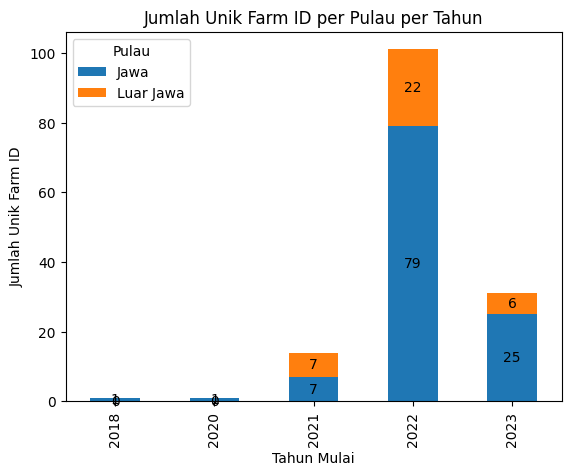

In [208]:
ax = bdy.plot(kind='bar', stacked=True)
plt.title('Jumlah Unik Farm ID per Pulau per Tahun')
plt.xlabel('Tahun Mulai')
plt.ylabel('Jumlah Unik Farm ID')
plt.legend(title='Pulau')
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()
plt.show()

###Jumlah tambak

In [209]:
bdy_eda.groupby(['province'])['farm_id'].nunique().sort_values(ascending=False)

province
JAWA TENGAH                  43
JAWA TIMUR                   37
JAWA BARAT                   25
BALI                         12
KEPULAUAN BANGKA BELITUNG     4
LAMPUNG                       4
SULAWESI SELATAN              3
SULAWESI TENGAH               3
SUMATERA BARAT                2
ACEH                          1
BANTEN                        1
GORONTALO                     1
NUSA TENGGARA BARAT           1
Name: farm_id, dtype: int64

###Produksi udang per tahun

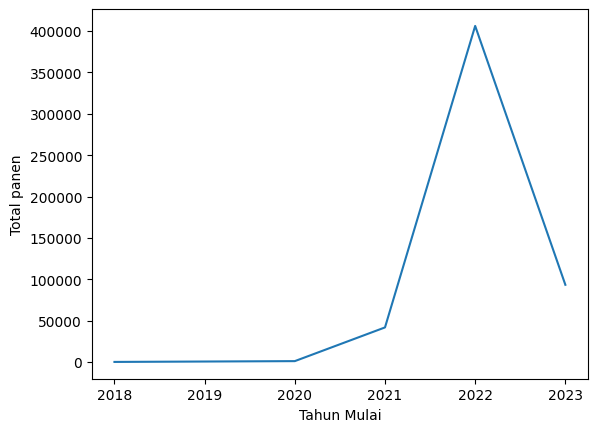

In [210]:
bdy = budidaya.groupby(['tahun_mulai'])['weight'].sum()
ax = bdy.plot(kind='line', stacked=True)
plt.xlabel('Tahun Mulai')
plt.ylabel('Total panen')
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

## Kualitas air

In [211]:
kualitas_air.select_dtypes(include=['int','float']).agg(['count', 'nunique', 'mean', 'std','var','min', 'max' ]).transpose()

,count,nunique,mean,std,var,min,max
morning_temperature,31417.000,2412.000,28.933,154.128,23755.538,2.640,27341.000
evening_temperature,31417.000,2704.000,29.668,8.520,72.586,1.000,1078.933
morning_do,31417.000,3687.000,5.397,32.186,1035.927,-12.664,5642.000
evening_do,31417.000,4332.000,5.839,4.615,21.299,-42.260,768.000
morning_salinity,31417.000,5567.000,21.991,53.564,2869.087,-25.000,9124.000
evening_salinity,31417.000,5344.000,19.637,9.883,97.670,0.000,1528.000
morning_pH,31417.000,1794.000,8.154,41.911,1756.539,0.100,7421.000
evening_pH,31417.000,1310.000,8.284,6.783,46.006,0.300,862.000
transparency,31417.000,194.000,42.468,15.102,228.062,-35.000,501.000
turbidity,31417.000,10.000,29.510,0.431,0.186,0.000,55.000


#Uji hipotesis

Menguji apakah terdapat perbedaan antar kelompok, menggunakan uji kruskall wallis (non parametrik)

##Kolam

In [212]:
# Memisahkan data berdasarkan kategori
groups = budidaya.groupby('pond_id')['est_survivalrate'].apply(list)

# Melakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Menampilkan hasil
print(f'Statistik uji: {stat}')
print(f'p-value: {p}')

# Menentukan apakah ada perbedaan signifikan
alpha = 0.05
if p < alpha:
    print("Terdapat perbedaan yang signifikan antara kelompok kolam (tolak H0)")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok kolam(gagal tolak H0)")

Statistik uji: 1325.4343755791183
p-value: 3.511368325497093e-108
Terdapat perbedaan yang signifikan antara kelompok kolam (tolak H0)


In [213]:
# Memisahkan data berdasarkan kategori
groups = budidaya.groupby('pond_id')['adg'].apply(list)

# Melakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Menampilkan hasil
print(f'Statistik uji: {stat}')
print(f'p-value: {p}')

# Menentukan apakah ada perbedaan signifikan
alpha = 0.05
if p < alpha:
    print("Terdapat perbedaan yang signifikan antara kelompok kolam (tolak H0)")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok kolam (gagal tolak H0)")

Statistik uji: 893.2289956669201
p-value: 1.318732611316451e-45
Terdapat perbedaan yang signifikan antara kelompok kolam (tolak H0)


In [214]:
# Memisahkan data berdasarkan kategori
groups = budidaya.groupby('pond_id')['fcr'].apply(list)

# Melakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Menampilkan hasil
print(f'Statistik uji: {stat}')
print(f'p-value: {p}')

# Menentukan apakah ada perbedaan signifikan
alpha = 0.05
if p < alpha:
    print("Terdapat perbedaan yang signifikan antara kelompok kolam (tolak H0)")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok kolam (gagal tolak H0)")

Statistik uji: 1235.2046652344902
p-value: 3.527566658363752e-94
Terdapat perbedaan yang signifikan antara kelompok kolam (tolak H0)


##Tambak

In [215]:
# Memisahkan data berdasarkan kategori
groups = budidaya.groupby('farm_id')['est_survivalrate'].apply(list)

# Melakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Menampilkan hasil
print(f'Statistik uji: {stat}')
print(f'p-value: {p}')

# Menentukan apakah ada perbedaan signifikan
alpha = 0.05
if p < alpha:
    print("Terdapat perbedaan yang signifikan antara kelompok tambak (tolak H0)")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok tambak (gagal tolak H0)")

Statistik uji: 1261.8219506778282
p-value: 1.2117799798043533e-181
Terdapat perbedaan yang signifikan antara kelompok tambak (tolak H0)


In [216]:
# Memisahkan data berdasarkan kategori
groups = budidaya.groupby('pond_id')['adg'].apply(list)

# Melakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Menampilkan hasil
print(f'Statistik uji: {stat}')
print(f'p-value: {p}')

# Menentukan apakah ada perbedaan signifikan
alpha = 0.05
if p < alpha:
    print("Terdapat perbedaan yang signifikan antara kelompok tambak (tolak H0)")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok tambak (gagal tolak H0)")

Statistik uji: 893.2289956669201
p-value: 1.318732611316451e-45
Terdapat perbedaan yang signifikan antara kelompok tambak (tolak H0)


In [217]:
# Memisahkan data berdasarkan kategori
groups = budidaya.groupby('pond_id')['fcr'].apply(list)

# Melakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Menampilkan hasil
print(f'Statistik uji: {stat}')
print(f'p-value: {p}')

# Menentukan apakah ada perbedaan signifikan
alpha = 0.05
if p < alpha:
    print("Terdapat perbedaan yang signifikan antara kelompok tambak (tolak H0)")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok tambak (gagal tolak H0)")

Statistik uji: 1235.2046652344902
p-value: 3.527566658363752e-94
Terdapat perbedaan yang signifikan antara kelompok tambak (tolak H0)


##Waktu budidaya

In [218]:
# Memisahkan data berdasarkan kategori
groups = budidaya.groupby('bulan_mulai')['est_survivalrate'].apply(list)

# Melakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Menampilkan hasil
print(f'Statistik uji: {stat}')
print(f'p-value: {p}')

# Menentukan apakah ada perbedaan signifikan
alpha = 0.05
if p < alpha:
    print("Terdapat perbedaan yang signifikan antara kelompok waktu budidaya (tolak H0)")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok waktu budidaya (gagal tolak H0)")

Statistik uji: 225.90137975078272
p-value: 3.0393129921897607e-42
Terdapat perbedaan yang signifikan antara kelompok waktu budidaya (tolak H0)


In [219]:
# Memisahkan data berdasarkan kategori
groups = budidaya.groupby('bulan_mulai')['adg'].apply(list)

# Melakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Menampilkan hasil
print(f'Statistik uji: {stat}')
print(f'p-value: {p}')

# Menentukan apakah ada perbedaan signifikan
alpha = 0.05
if p < alpha:
    print("Terdapat perbedaan yang signifikan antara kelompok waktu budidaya (tolak H0)")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok waktu budidaya (gagal tolak H0)")

Statistik uji: 153.83782370604143
p-value: 2.44710418422309e-27
Terdapat perbedaan yang signifikan antara kelompok waktu budidaya (tolak H0)


In [220]:
# Memisahkan data berdasarkan kategori
groups = budidaya.groupby('bulan_mulai')['fcr'].apply(list)

# Melakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Menampilkan hasil
print(f'Statistik uji: {stat}')
print(f'p-value: {p}')

# Menentukan apakah ada perbedaan signifikan
alpha = 0.05
if p < alpha:
    print("Terdapat perbedaan yang signifikan antara kelompok waktu budidaya (tolak H0)")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok waktu budidaya (gagal tolak H0)")

Statistik uji: 205.52699193842406
p-value: 5.297212383775053e-38
Terdapat perbedaan yang signifikan antara kelompok waktu budidaya (tolak H0)


#Random forest

##budidaya

In [221]:
#import statsmodels.api as sm
X = budidaya[['length','width','area','padat_tebar','total_seed',   'daily_feed', 'fasting', 'average_weight',        'size', 'weight']]

###SR

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
y = budidaya['est_survivalrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Melatih model Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
# Mengambil pentingnya fitur
importances = forest_model.feature_importances_
feature_names = X.columns
# Membuat DataFrame untuk menampilkan pentingnya fitur dalam bentuk tabel
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

          Feature  Importance
7  average_weight       0.963
5      daily_feed       0.020
4      total_seed       0.007
3     padat_tebar       0.004
1           width       0.003
2            area       0.001
0          length       0.001
9          weight       0.000
8            size       0.000
6         fasting       0.000


###ADG

In [223]:
y = budidaya['adg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Melatih model Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
# Mengambil pentingnya fitur
importances = forest_model.feature_importances_
feature_names = X.columns
# Membuat DataFrame untuk menampilkan pentingnya fitur dalam bentuk tabel
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

          Feature  Importance
7  average_weight       0.517
3     padat_tebar       0.224
5      daily_feed       0.107
2            area       0.056
4      total_seed       0.037
1           width       0.018
0          length       0.016
9          weight       0.014
8            size       0.012
6         fasting       0.000


###FCR

In [224]:
y = budidaya['fcr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Melatih model Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
# Mengambil pentingnya fitur
importances = forest_model.feature_importances_
feature_names = X.columns
# Membuat DataFrame untuk menampilkan pentingnya fitur dalam bentuk tabel
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

          Feature  Importance
7  average_weight       0.406
4      total_seed       0.258
5      daily_feed       0.149
9          weight       0.057
3     padat_tebar       0.035
0          length       0.027
2            area       0.026
8            size       0.024
1           width       0.018
6         fasting       0.000


##kualitas air

In [225]:
X = kualitas_air[['morning_temperature', 'evening_temperature', 'morning_do',
       'evening_do', 'morning_salinity', 'evening_salinity', 'morning_pH',
       'evening_pH', 'transparency', 'turbidity', 'ammonia', 'nitrate',
       'nitrite', 'alkalinity', 'hardness', 'calcium', 'magnesium',
       'carbonate', 'bicarbonate', 'tom', 'total_plankton_']]

###SR

In [226]:
y = kualitas_air['est_survivalrate']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Melatih model Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
# Mengambil pentingnya fitur
importances = forest_model.feature_importances_
feature_names = X.columns
# Membuat DataFrame untuk menampilkan pentingnya fitur dalam bentuk tabel
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

                Feature  Importance
8          transparency       0.183
0   morning_temperature       0.149
7            evening_pH       0.135
6            morning_pH       0.134
3            evening_do       0.119
1   evening_temperature       0.075
2            morning_do       0.071
12              nitrite       0.064
4      morning_salinity       0.048
5      evening_salinity       0.017
20      total_plankton_       0.001
13           alkalinity       0.001
14             hardness       0.001
16            magnesium       0.001
19                  tom       0.001
10              ammonia       0.001
15              calcium       0.000
18          bicarbonate       0.000
9             turbidity       0.000
11              nitrate       0.000
17            carbonate       0.000


###ADG

In [228]:
y = kualitas_air['adg']

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Melatih model Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
# Mengambil pentingnya fitur
importances = forest_model.feature_importances_
feature_names = X.columns
# Membuat DataFrame untuk menampilkan pentingnya fitur dalam bentuk tabel
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

                Feature  Importance
0   morning_temperature       0.135
4      morning_salinity       0.134
1   evening_temperature       0.115
5      evening_salinity       0.111
2            morning_do       0.107
6            morning_pH       0.106
7            evening_pH       0.099
8          transparency       0.079
3            evening_do       0.077
20      total_plankton_       0.012
19                  tom       0.008
13           alkalinity       0.004
14             hardness       0.003
12              nitrite       0.003
18          bicarbonate       0.002
16            magnesium       0.002
15              calcium       0.001
10              ammonia       0.001
11              nitrate       0.001
17            carbonate       0.001
9             turbidity       0.000


###FCR

In [230]:
y = kualitas_air['fcr']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Melatih model Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
# Mengambil pentingnya fitur
importances = forest_model.feature_importances_
feature_names = X.columns
# Membuat DataFrame untuk menampilkan pentingnya fitur dalam bentuk tabel
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

                Feature  Importance
6            morning_pH       0.282
1   evening_temperature       0.127
2            morning_do       0.118
4      morning_salinity       0.107
8          transparency       0.089
0   morning_temperature       0.086
3            evening_do       0.070
7            evening_pH       0.052
5      evening_salinity       0.038
20      total_plankton_       0.010
14             hardness       0.004
12              nitrite       0.003
19                  tom       0.003
13           alkalinity       0.002
10              ammonia       0.002
18          bicarbonate       0.002
15              calcium       0.002
16            magnesium       0.001
17            carbonate       0.001
11              nitrate       0.000
9             turbidity       0.000
